<a href="https://colab.research.google.com/github/rhodes-byu/cs180-winter25/blob/main/notebooks/12-intro-ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import randint

sns.set(style = "darkgrid")

### **Loading a Dataset**

In [3]:
data = datasets.load_wine() # Pick a dataset: iris, wine, breast_cancer
X = data.data  # Features
y = data.target  # Labels

# Convert to a DataFrame for exploration
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Display the first few rows
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


### **Data Summary**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

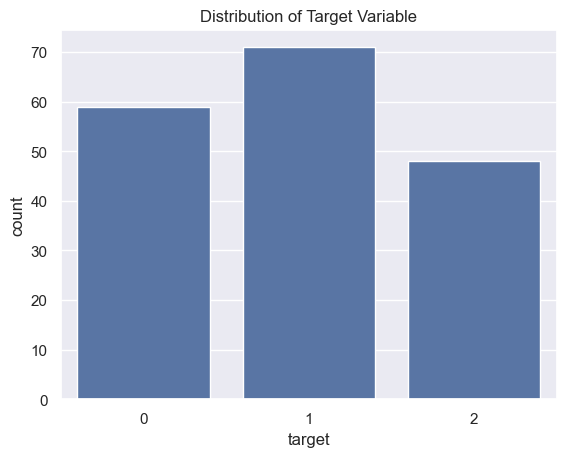

In [4]:
print(df.info())

# Check if the target variable is balanced
target_counts = df['target'].value_counts()
print(target_counts)

# Plot the distribution of the target variable
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()



### **Splitting Data into Training and Testing Sets**

In [5]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (142, 13)
Testing data shape: (36, 13)


### **Training and Evaluating a K-Nearest Neighbors (KNN) Classifier**

In [6]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8055555555555556

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.92      0.79      0.85        14
           2       0.60      0.75      0.67         8

    accuracy                           0.81        36
   macro avg       0.79      0.80      0.79        36
weighted avg       0.82      0.81      0.81        36



### **Training and Evaluating a Logistic Regression Model**

In [ ]:
# Initialize the model
log_reg = LogisticRegression(max_iter=200)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg))

### **Training and Evaluating a Decision Tree Classifier**

In [ ]:
# Initialize the model
tree = DecisionTreeClassifier(random_state=42)

# Train the model
tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree.predict(X_test)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))

### **Cross-Validation**

In [ ]:
# Perform 5-fold cross-validation for each model
models = {'KNN': knn, 'Decision Tree': tree, 'Logistic Regression': log_reg}

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring = 'f1_weighted')
    print(f"{name} Cross-Validation Score: {scores.mean():.2f} ± {scores.std():.2f}")

### **Visualizing the Confusion Matrix**

In [ ]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

In [ ]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for KNN")
plt.show()

### **Feature Scaling: StandardScaler**

In [ ]:
# Standardize features (zero mean, unit variance)
scaler = StandardScaler()

# Fit the scaler on training data and transform both train and test sets
scaler.fit(X_train)

# Alternatively:
# X_train_scaled = scaler.fit_transform(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Mean of scaled features (train):", X_train_scaled.mean(axis=0))
print("Standard deviation of scaled features (train):", X_train_scaled.std(axis=0))

### **Feature Scaling: MinMaxScaler**

In [ ]:
# Scale features to the [0, 1] range
minmax_scaler = MinMaxScaler()

# Fit the scaler on training data and transform both train and test sets
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

print("Minimum of scaled features (train):", X_train_minmax.min(axis=0))
print("Maximum of scaled features (train):", X_train_minmax.max(axis=0))

print("Minimum of scaled features (test):", X_test_minmax.min(axis=0))
print("Maximum of scaled features (test):", X_test_minmax.max(axis=0))

### **Training a K-Nearest Neighbors (KNN) Classifier with Scaled Data**

In [ ]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on scaled data
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn_scaled = knn.predict(X_test_scaled)

# Evaluate the model
print("KNN Accuracy (scaled):", accuracy_score(y_test, y_pred_knn_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_scaled))

print("KNN Accuracy (not scaled):", accuracy_score(y_test, y_pred_knn))

### **Training a Decision Tree Classifier**

In [ ]:
# Train the model
tree.fit(X_train_scaled, y_train)

# Make predictions
y_pred_tree_scaled = tree.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Accuracy (scaled):", accuracy_score(y_test, y_pred_tree_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree_scaled))

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))


### **Training a Logistic Regression Model with Scaled Data**

In [ ]:
# Initialize the model
log_reg = LogisticRegression(max_iter=200)

# Train the model on scaled data
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg_scaled = log_reg.predict(X_test_scaled)

# Evaluate the model
print("Logistic Regression Accuracy (scaled):", accuracy_score(y_test, y_pred_log_reg_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log_reg_scaled))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))

### **Cross-Validation, Scaled Data**

In [ ]:
# Perform 5-fold cross-validation for each model
models = {
    'KNN (scaled)': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression (scaled)': LogisticRegression(max_iter=200)
}

for name, model in models.items():
    # Apply scaling where necessary
    if 'scaled' in name:
        X_transformed = scaler.fit_transform(X)
    else:
        X_transformed = X
    
    scores = cross_val_score(model, X_transformed, y, cv=5)
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.2f} ± {scores.std():.2f}")

### **Visualizing the Confusion Matrix (Scaled Data)**

In [ ]:
# Compute confusion matrix for one model (e.g., Logistic Regression with scaled data)
cm = confusion_matrix(y_test, y_pred_log_reg_scaled)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Logistic Regression (Scaled)")
plt.show()


### **Hyperparameter Tuning**: GridSearchCV

In [ ]:
# Example: Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [1, 3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best cross-validation score for KNN:", grid_knn.best_score_)

In [ ]:
# Test on the test set
best_knn = grid_knn.best_estimator_
y_pred_knn_tuned = best_knn.predict(X_test_scaled)
print("Test accuracy for best KNN model:", accuracy_score(y_test, y_pred_knn_tuned))

In [ ]:
sns.histplot(grid_knn.cv_results_['mean_test_score'])
plt.xlabel('Mean Test Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Test Scores for KNN')
plt.show()

### **Visualizing Hyperparameter Search Results**

In [ ]:
# Visualize GridSearchCV results for KNN
results_knn = pd.DataFrame(grid_knn.cv_results_)
results_knn_pivot = results_knn.pivot_table(index='param_n_neighbors',
                                            columns='param_weights', 
                                            values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(
    results_knn_pivot,
    annot=True, fmt=".3f", cmap="viridis"
)
plt.title("KNN Hyperparameter Search Results")
plt.ylabel("Metric")
plt.xlabel("Number of Neighbors")
plt.show()

### **Using RandomizedSearchCV** for Decision Tree

In [ ]:
# Example: Hyperparameter tuning for Decision Tree
param_dist_tree = {
    'max_depth': [None, 5, 10, 20, 30, 40],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'criterion': ['gini', 'entropy']
}

random_tree = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), param_dist_tree,
                                 n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
                                 
random_tree.fit(X_train, y_train)

print("Best parameters for Decision Tree:", random_tree.best_params_)
print("Best cross-validation score for Decision Tree:", random_tree.best_score_)

In [ ]:
# Test on the test set
best_tree = random_tree.best_estimator_
y_pred_tree_tuned = best_tree.predict(X_test)
print("Test accuracy for best Decision Tree model:", accuracy_score(y_test, y_pred_tree_tuned))

In [ ]:
sns.histplot(random_tree.cv_results_['mean_test_score'])
plt.xlabel('Mean Test Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Test Scores for DT')
plt.show()

### **Hyperparameter Tuning for Logistic Regression**

In [ ]:
# Example: Hyperparameter tuning for Logistic Regression
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (lambda values from notes)
    'penalty': ['none', 'l2'],  # Regularization technique
    'max_iter': [10, 100, 200, 500]  # Iterations
}

grid_log_reg = GridSearchCV(LogisticRegression(random_state=42), param_grid_log_reg, cv=5, scoring='accuracy', n_jobs=-1)
grid_log_reg.fit(X_train_scaled, y_train)

print("Best parameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best cross-validation score for Logistic Regression:", grid_log_reg.best_score_)

In [ ]:
# Test on the test set
best_log_reg = grid_log_reg.best_estimator_
y_pred_log_reg_tuned = best_log_reg.predict(X_test_scaled)
print("Test accuracy for best Logistic Regression model:", accuracy_score(y_test, y_pred_log_reg_tuned))

In [ ]:
sns.histplot(grid_log_reg.cv_results_['mean_test_score'])
plt.xlabel('Mean Test Score')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Test Scores for Log. Reg.')
plt.show()

### **Comparing the Tuned Models**

In [ ]:
# Compare accuracy for tuned models
models = {
    "KNN (tuned)": best_knn,
    "Decision Tree (tuned)": best_tree,
    "Logistic Regression (tuned)": best_log_reg
}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled if "Logistic" in name or "KNN" in name else X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name} Test Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")